# Continuous Authentication
Continuous Authentication is an interesting area of computer security that has the potential to be an addition to passwords, but act as a form of continuous password, using biometrics


In [2]:
import preprocess

subject = 4

# Preprocessing the data is easy, we can pass in a specific subject to get the data for.
# This data is shuffled automatically, however if you don't want it shuffled, you can 
# pass shuffled=False to the binary classify function
X_train, X_test, y_train, y_test = preprocess.binary_classify(subject=subject, save=False)

# When looking at the head, we will notice two values, 0 and 1 (if the data is shuffled, 
# otherwise, you'll just see 1's). The 0 represents imposer user data, while 1 represents 
# a genuine user row.
y_train.head()

37363    0
55898    0
18647    1
4100     0
13393    1
Name: ID, dtype: int64

# Running models
There are two main types of models I'm working with here, *classifiers* and *regressors*. Classifiers are here to do binary classification, is the mouse event presented to the model a genuine user action or an imposter user action. Regressors, on the other hand, assign somewhat a probability to the event.


In [3]:
from sklearn.neighbors import KNeighborsClassifier

# We can create the classifier
classifier = KNeighborsClassifier()
# Fit our training data to the classifier
classifier.fit(X_train, y_train)
# And create predictions from that classifier
y_cls_pred = classifier.predict(X_test)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_reg_pred = regressor.predict(X_test)

# Validating the models
Here are two blocks for validating the classifier and regressor, respectively. We can use some traditional metrics to evaluate the classifier,
and figure a Trust Score for the regressor. The idea of a Trust Score is to lock out the user once the score breaches a certain threshold, in 
our case that threshold is 70.

Accuracy: 94.9187%
Precision: 92.5110%
Recall: 97.7793%
F1: 95.0722%


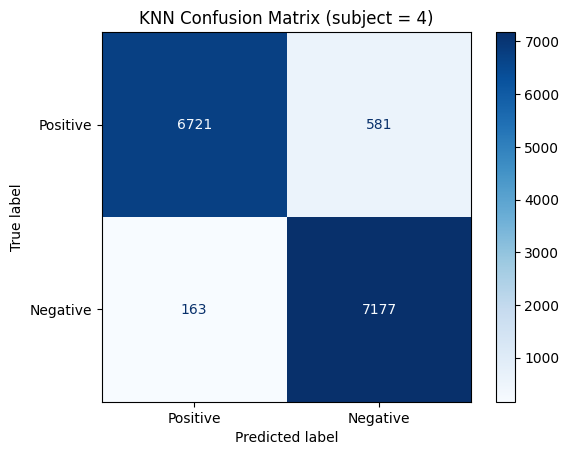

In [5]:
import validation
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

validation.calculate_metric_scores(y_test, y_cls_pred)

disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels=["Positive", "Negative"],
    cmap=plt.cm.Blues,
).ax_.set_title(f"KNN Confusion Matrix ({subject = })")

plt.show()

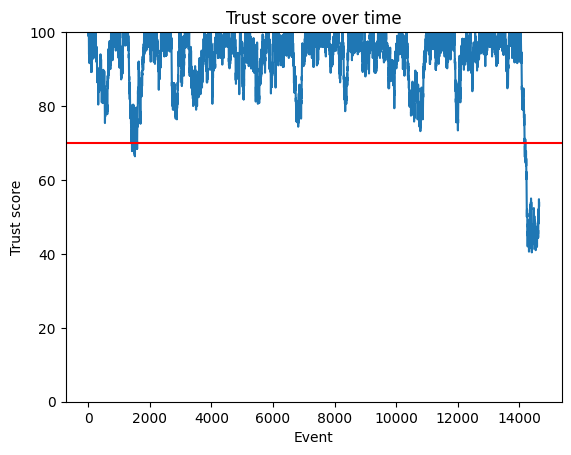

In [17]:
import config

C = [config.STARTING_VALUE]

for pred in y_reg_pred:
    if pred >= 0.5:
        C.append(min(C[-1] + pred, 100))
    elif pred >= 0.3:
        C.append(max(C[-1] - (1 - pred), 0))
    else:
        C.append(max(C[-1] - 1, 0))

plt.plot(range(len(y_reg_pred)), C[1:])

plt.title("Trust score over time")
plt.xlabel('Event')
plt.ylabel('Trust score')

plt.axhline(y=config.THRESHOLD, color="r", linestyle="-", label="Threshold")

plt.ylim(0, 100)

plt.show()